<a href="https://colab.research.google.com/github/xzdil/googlecollabprojects/blob/main/Adil_Rakhimzhanov_BD_2106_Assingment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&D1: Assignment 1
## Deadline: January 14 (until 14:00)
## This is an individual or a group assignment (max 2 students). You are allowed to use any previously written source for your research on the topic. However, any source other than the textbook and the class notes should be cited and the bibliographic information should be given.


**Instructions:** All answers should be filled in the notebook and then submitted.
Name of notebook should be in following format:
 - Name_Surname_Group_Assignment1.ipynb (ex. Beibit_Abdikenov_BDA_210X_Assignment1.ipynb)

# Q1 (30%)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using the Matplotlib library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 1 Task

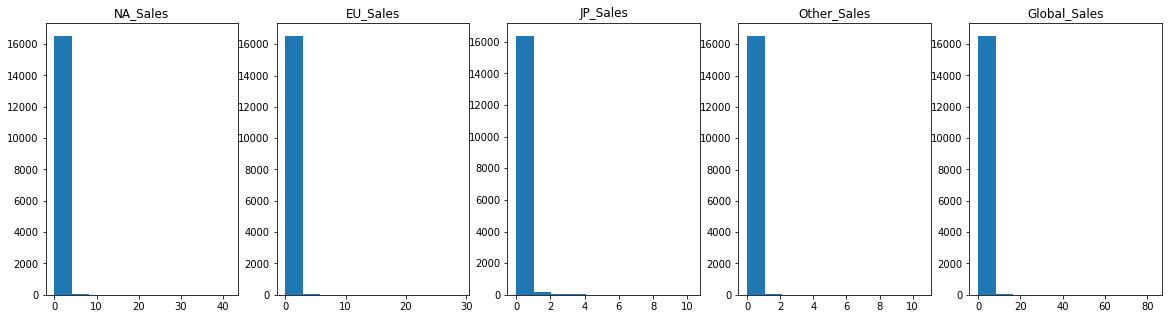

In [ ]:
arr = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
fig, axs = plt.subplots(1,len(arr), figsize=(20,5))

for i in range(len(arr)):
  subplot = axs[i]
  subplot.set_title(arr[i])
  subplot.hist(df[arr[i]])
plt.show()

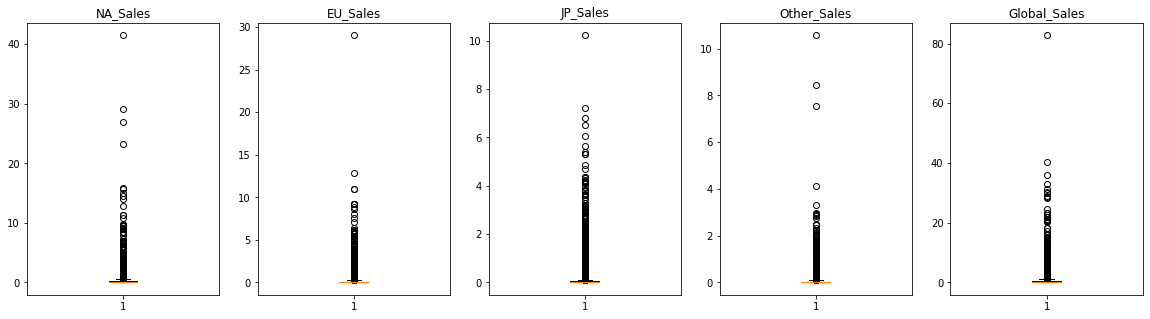

In [ ]:

fig, axs = plt.subplots(1,len(arr), figsize=(20,5))
for i in range(len(arr)):
  subplot = axs[i]
  subplot.set_title(arr[i])
  subplot.boxplot(df[arr[i]])
plt.show()

## 2,3 Tasks

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 4 Task

In [ ]:

def findOutliers(df,i):
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1

  lowerBound = Q1-1.5*IQR
  upperBound = Q3+1.5*IQR

  return df[i].index[(df[i]<lowerBound) | (df[i]>upperBound)]

cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
index_list = []
for col in cols:
  index_list.extend(findOutliers(df,col))

In [ ]:
def removeOutliers(df,indexes):
  df = df.drop(indexes)
  return df

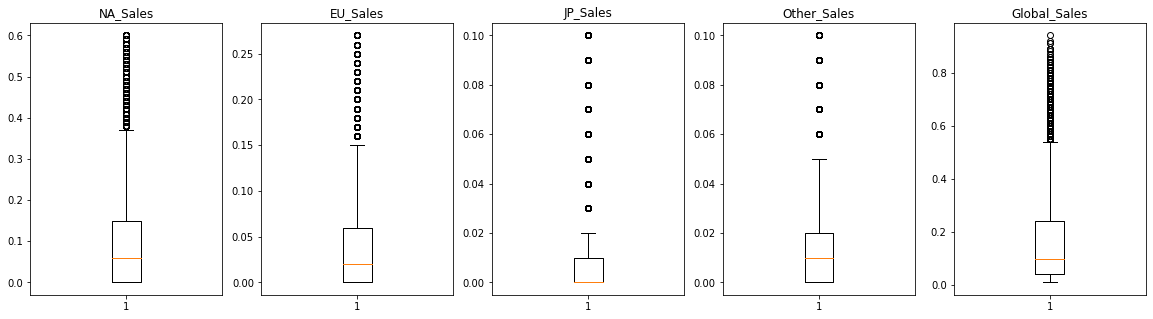

In [ ]:
df1 = removeOutliers(df,index_list)
fig, axs = plt.subplots(1,len(arr), figsize=(20,5))

for i in range(len(arr)):
  subplot = axs[i]
  subplot.set_title(arr[i])
  subplot.boxplot(df1[arr[i]])
plt.show()

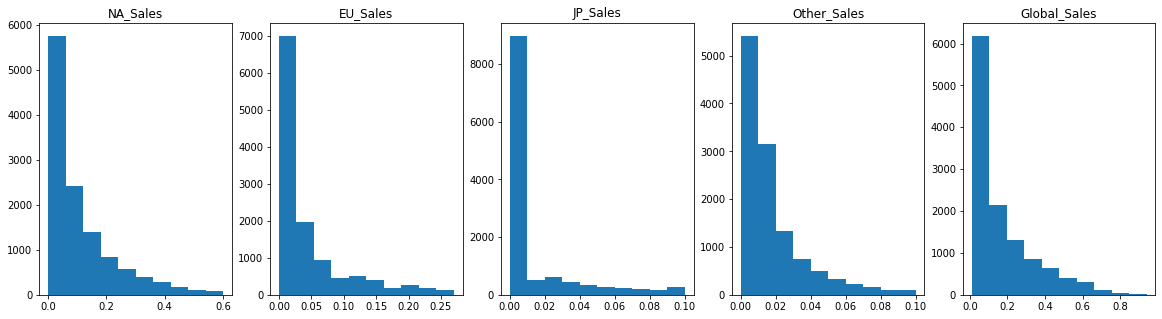

In [ ]:
df1 = removeOutliers(df,index_list)
fig, axs = plt.subplots(1,len(arr), figsize=(20,5))

for i in range(len(arr)):
  subplot = axs[i]
  subplot.set_title(arr[i])
  subplot.hist(df1[arr[i]])
plt.show()

## 5 Task

In [ ]:
print('Before removing outliers')
GS_med = df['Global_Sales'].median()
GS_mean = df['Global_Sales'].mean()
print(f'Median: {GS_med}\nMean: {GS_mean}')
print(f'Difference is {abs(GS_med-GS_mean)}')
print('\nAfter removing outliers')
GS_med1 = df1['Global_Sales'].median()
GS_mean1 = df1['Global_Sales'].mean()
print(f'Median: {GS_med1}\nMean: {GS_mean1}')
print(f'Difference is {abs(GS_med1-GS_mean1)}')

Before removing outliers
Median: 0.17
Mean: 0.5374406555006628
Difference is 0.36744065550066274

After removing outliers
Median: 0.1
Mean: 0.1666308870028291
Difference is 0.0666308870028291


# Q2 (20%)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [ ]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [ ]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

In [ ]:
from scipy.stats import norm
se_mean = np.mean(gpa_se)
bda_mean = np.mean(gpa_bda)

def conf_int(data):
  mean = np.mean(data)
  std_dev = np.std(data, ddof=1)
  n = len(data)
  se = std_dev / np.sqrt(n)
  cv = norm.ppf(0.975)
  confidence_interval = (mean - cv * se, mean + cv * se)
  return confidence_interval
print(f'confidence interval of SE {conf_int(gpa_se)}')
print(f'confidence interval of BDA {conf_int(gpa_bda)}\n')

print(f'SE group mean {se_mean} the average of this group is > 2.9')
print(f'BDA group mean {bda_mean} the average of this group is > 2.9')
print(f'BDA group performs better')
print('If the sample size is 30, the sample mean will be more precise and the standard error will be smaller,\nresulting in a narrower confidence interval. ')

confidence interval of SE (3.080584238969275, 3.2436465302614947)
confidence interval of BDA (3.296150786445393, 3.4418492135546064)

SE group mean 3.162115384615385 the average of this group is > 2.9
BDA group mean 3.3689999999999998 the average of this group is > 2.9
BDA group performs better
If the sample size is 30, the sample mean will be more precise and the standard error will be smaller,
resulting in a narrower confidence interval. 


## Q3 (10%)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

120.65
122.0
Based on this, it does look like the data in my_list is following a normal distribution,
since the mean and median are not quite far apart and based on values distribution as well


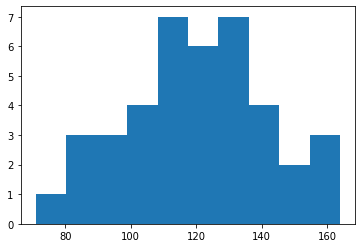

In [ ]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]
print(np.mean(my_list))
print(np.median(my_list))
plt.hist(my_list)
print('Based on this, it does look like the data in my_list is following a normal distribution,\nsince the mean and median are not quite far apart and based on values distribution as well')

## Q4 (10%)
Generate synthetic data (numpy.random.normal) with mean = 70, std = 12 and size = 1000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

Mean is 70.62925027871242
Median is 70.87574054924349
Mode is ModeResult(mode=array([33.14873539]), count=array([1]))


(array([1., 3., 3., 4., 7., 6., 7., 4., 2., 3.]),
 array([-2.31411956, -1.8806591 , -1.44719864, -1.01373817, -0.58027771,
        -0.14681725,  0.28664321,  0.72010367,  1.15356413,  1.58702459,
         2.02048505]),
 <a list of 10 Patch objects>)

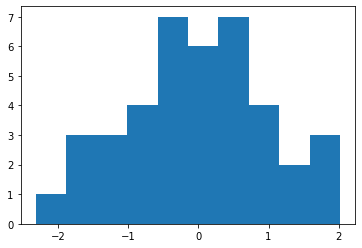

In [ ]:
from scipy.stats import mode
data = np.random.normal(70,12,1000)

print(f'Mean is {np.mean(data)}')
print(f'Median is {np.median(data)}')
print(f'Mode is {mode(data)}')
def norm_dist(data):
  z_score = 1.96
  mean = np.mean(data)
  zi = []
  for i in range(len(data)):
    zi.append((data[i]-mean)/np.std(data))
  return(np.array(zi))
plt.hist(norm_dist(my_list))

In [ ]:
def normD(x, ):


## Q5 (30%)
Verify the properties of Central Limit Theorem in Python using population.csv file.

__Tasks to do:__
1. Read the dataset and print it.
2. Extract Weight column from the dataset and see the distribution using Seaborn Library. 
3. Find out the mean and standard deviation of the weight column. 
4. Take a sample size of 30 members from the dataset (weight column). Find out the mean of sample. Compare with original mean and give comment.    
5. Create 1000 such samples and  find out the mean values. Assign it to a variable and store the mean values in a Series using Pandas. 
6. Find out the mean and standard deviation of all the 1000 samples. Compare with with original mean and standard deviation. Comment your results.

In [ ]:
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)


In [ ]:
df = pd.read_csv('population.csv', encoding = "ISO-8859-1")
df

,Player,Height,Weight,Age,School,BDate
0,VitorÿFaverani,83,260,25,None,5/5/1988
1,AveryÿBradley,74,180,22,Texas,11/26/1990
2,KeithÿBogans,77,215,33,Kentucky,5/12/1980
3,JaredÿSullinger,81,260,21,Ohio State,3/4/1992
4,JeffÿGreen,81,235,27,Georgetown,8/28/1986
...,...,...,...,...,...,...
500,LucÿMbah a Moute,80,230,27,UCLA,9/9/1986
501,JasonÿThompson,83,250,27,Rider,7/21/1986
502,ChuckÿHayes,78,238,30,Kentucky,6/11/1983
503,ColeÿAldrich,83,245,24,Kansas,10/31/1988


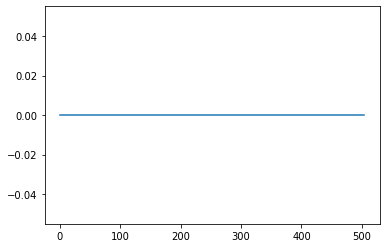

In [ ]:
mu = 0
std = 1
snd = stats.norm(mu, std)
plt.plot(snd.pdf(df['Height']))

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   30/30    |     
| 2       |   20/20 | 
| 3       |   10/10    |     
| 4       |   10/10 | 
| 5       |   30/30    |        
|**Total**|**100/100**  | 
